In [2]:
library('fpp3')
library(lubridate)

### 1.0. US Employment Dataset

In [61]:
df = read.csv('../../../data/us_employment.csv')
df = df |> select(Month, Employed, Title)

df$Month = gsub(' UTC', '', parse_date_time(df$Month, "Y b"))
df$Month = as.POSIXct(df$Month)

df = df |> filter(year(Month) >= 1990, Title == 'Retail Trade')

df$Month = strftime(df$Month, format="%Y-%m")
df$Month = yearmonth(df$Month)

df = df |> as_tsibble(index = Month)

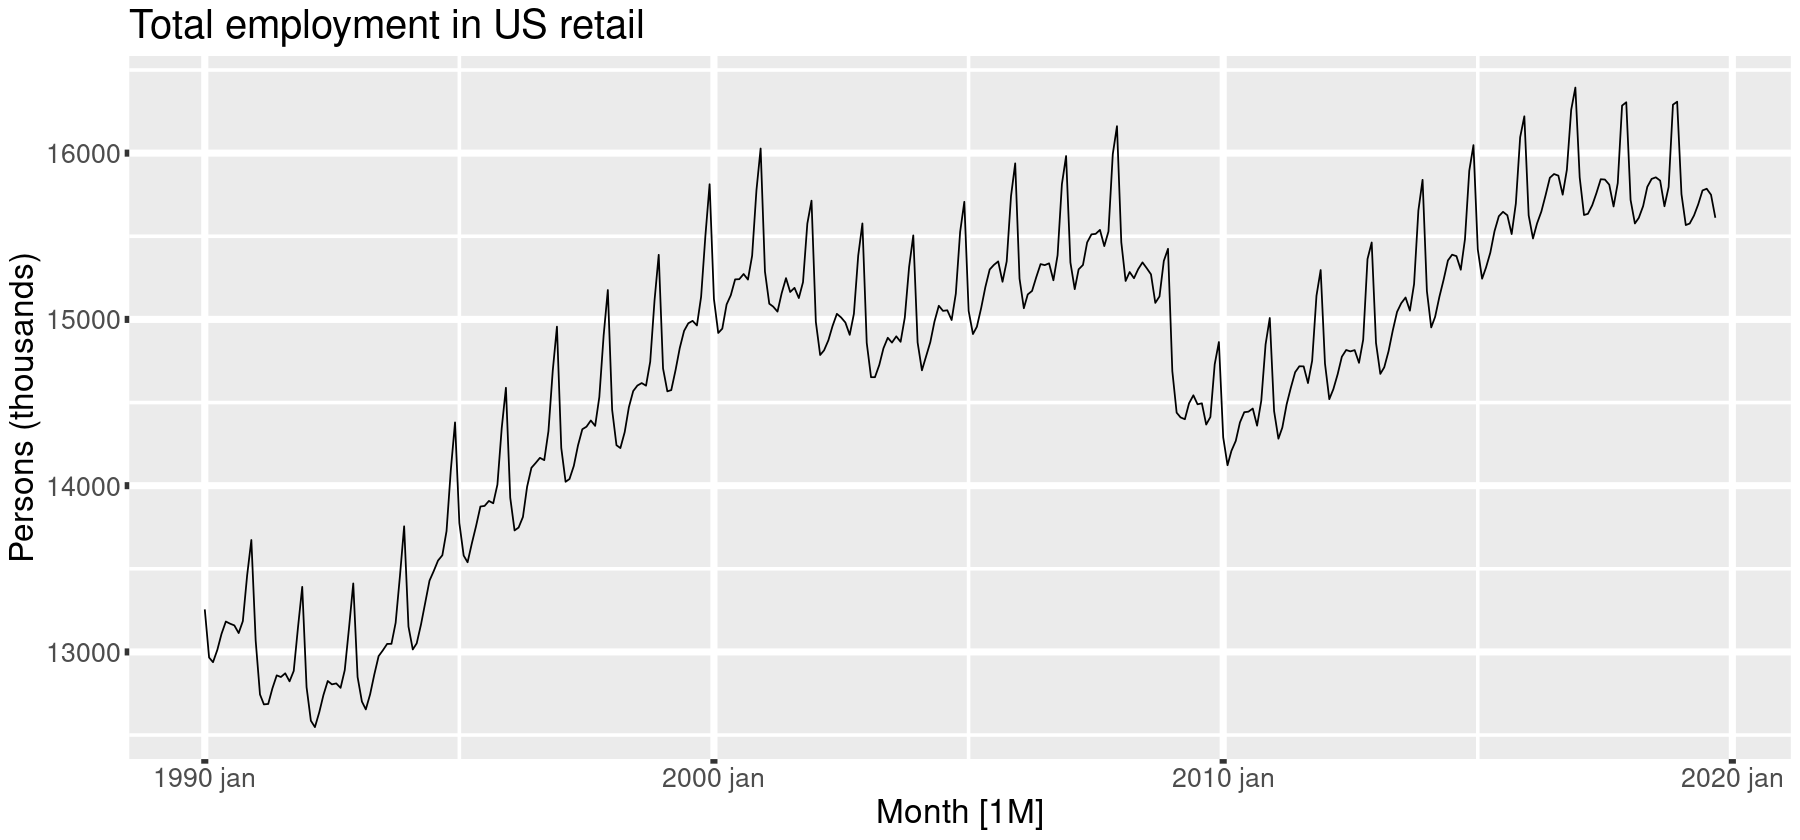

In [62]:
options(repr.plot.width = 15, repr.plot.height = 7)
df |> autoplot(Employed) + 
labs(
    title = "Total employment in US retail",
    y = "Persons (thousands)"
) +
theme(text = element_text(size = 20), element_line(size = 2))

#### 1.1. Time Series Decomposing With Moving Averages

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”


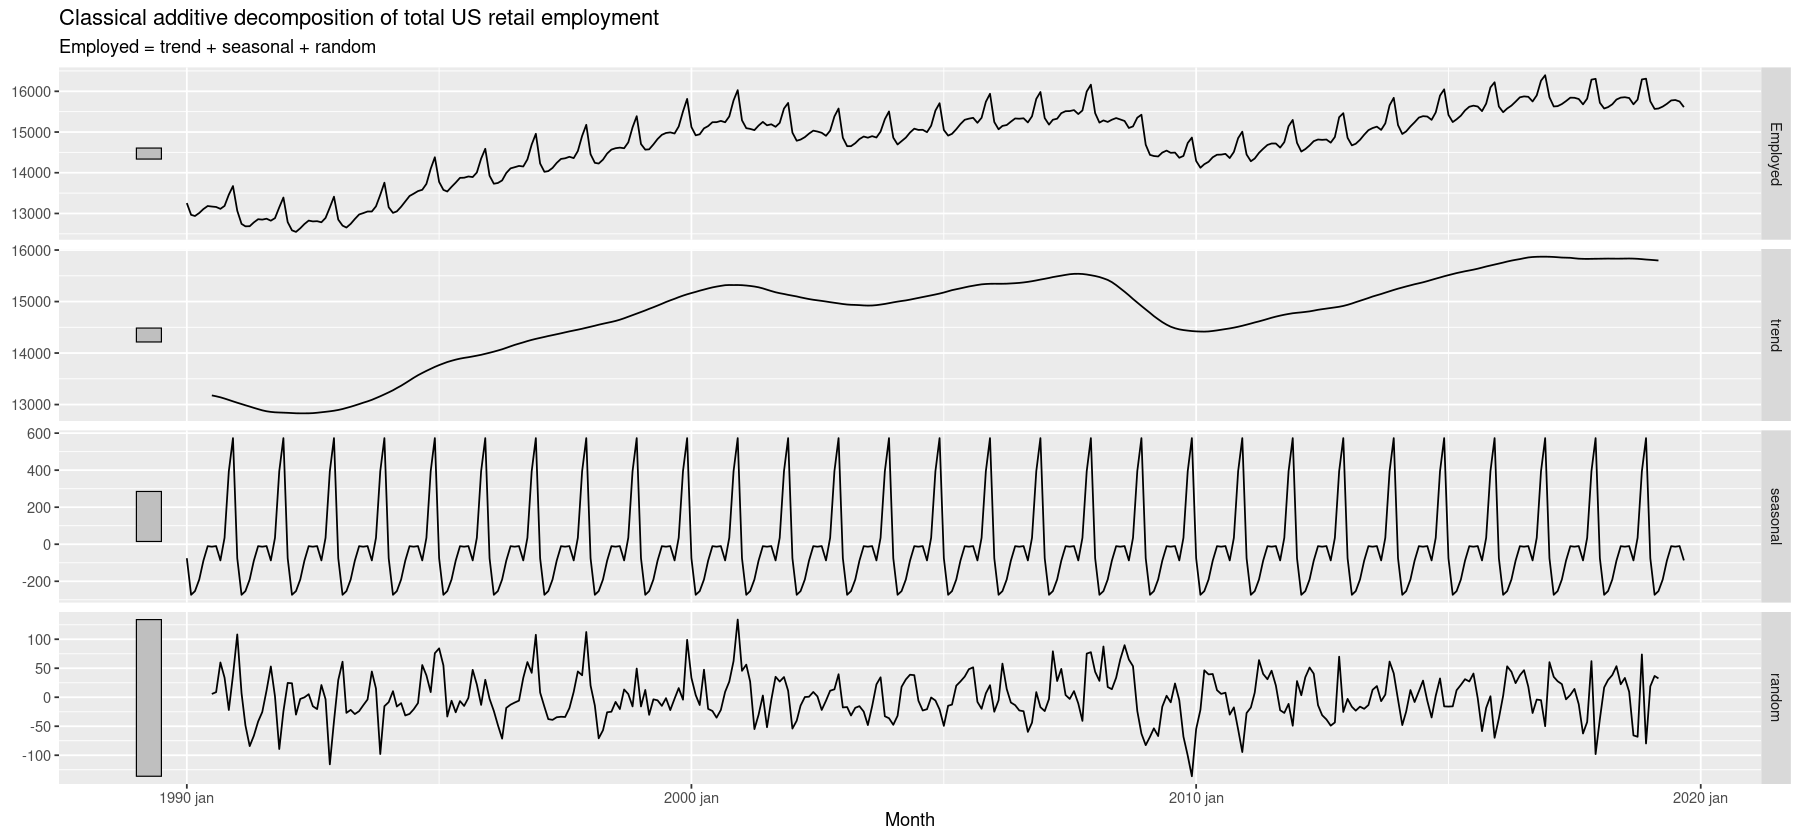

In [67]:
df |>
model(
  classical_decomposition(Employed, type = "additive")
) |> components() |> autoplot() +
labs(
  title = "Classical additive decomposition of total US retail employment"
)

#### 1.2. Time Series Decomposing With LOESS

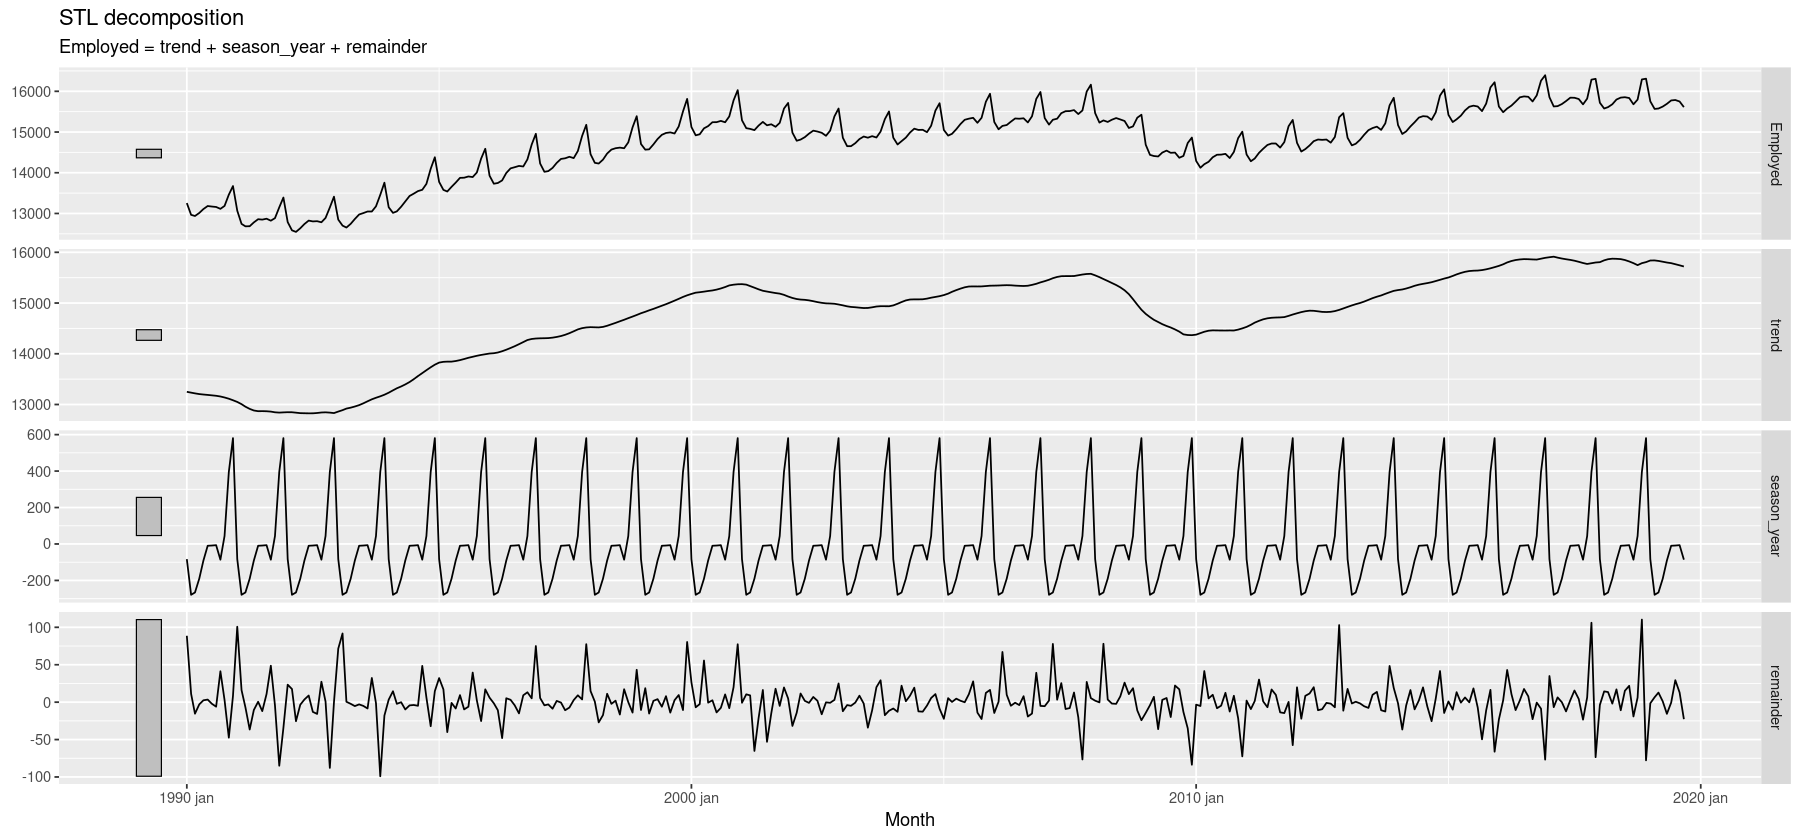

In [70]:
df |>
    model(
        STL(Employed ~ trend(window = 7) + season(window = "periodic"),
        robust = TRUE
    )
) |> components() |> autoplot()

### 2.0. Canadian Gas Dataset

In [78]:
df = read.csv('../../../data/canadian_gas.csv')
df = df |> select(Month, Volume)

df$Month = yearmonth(df$Month)

df = df |> as_tsibble(index = Month)

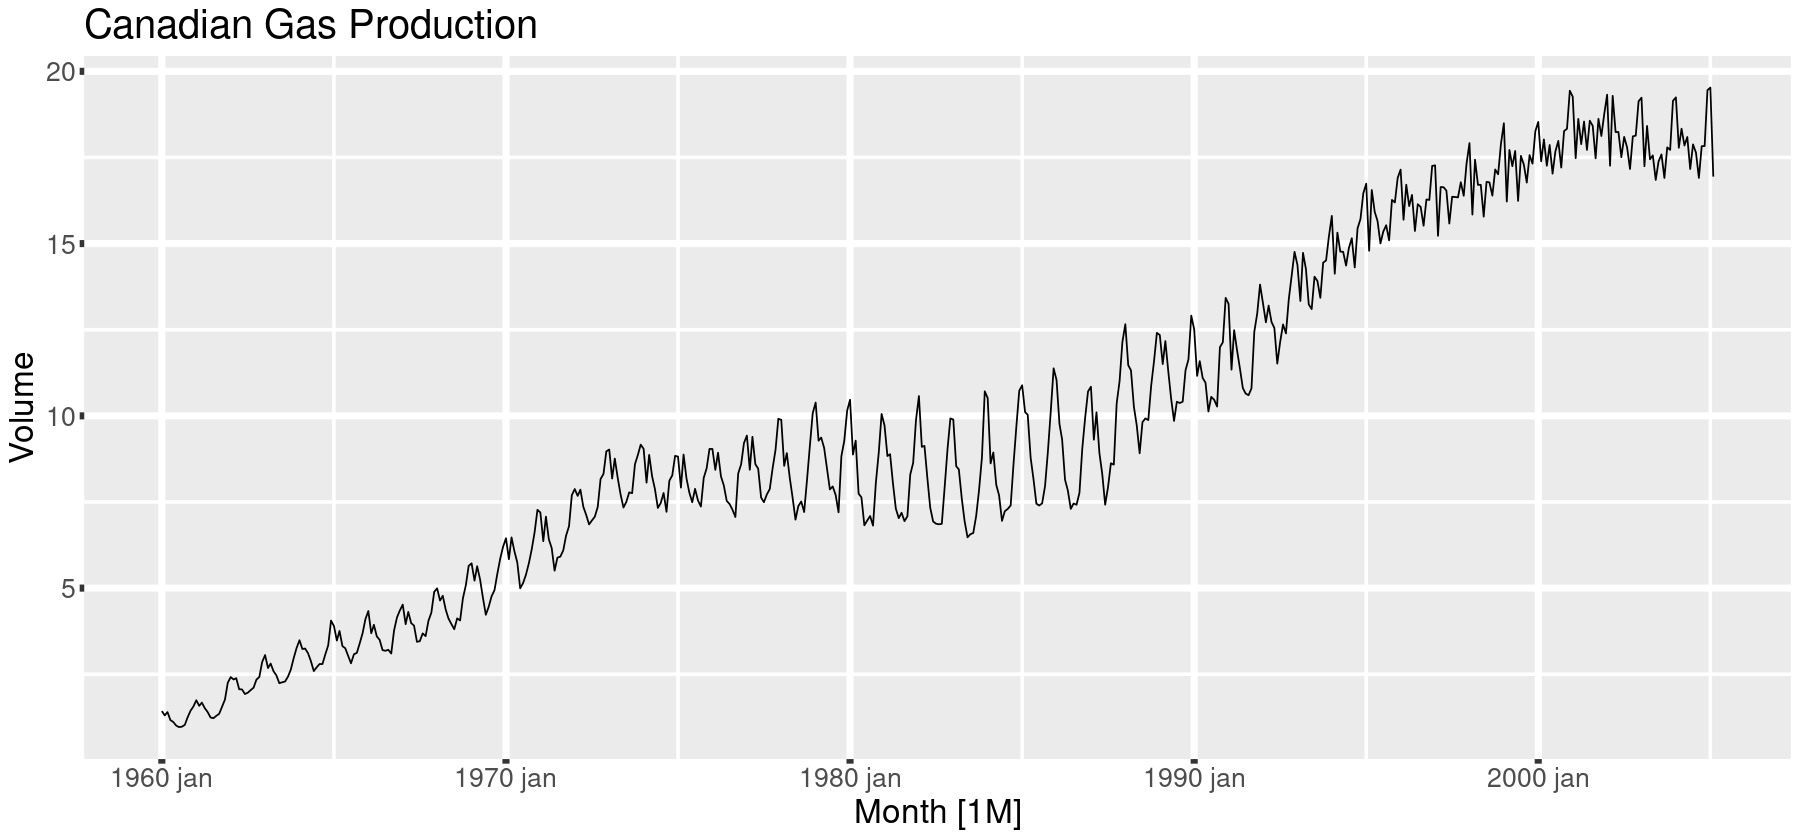

In [83]:
df |> autoplot(Volume) +
labs(title = "Canadian Gas Production") +
theme(text = element_text(size = 20), element_line(size = 2))

#### 2.1. Time Series Decomposing With Moving Averages

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”


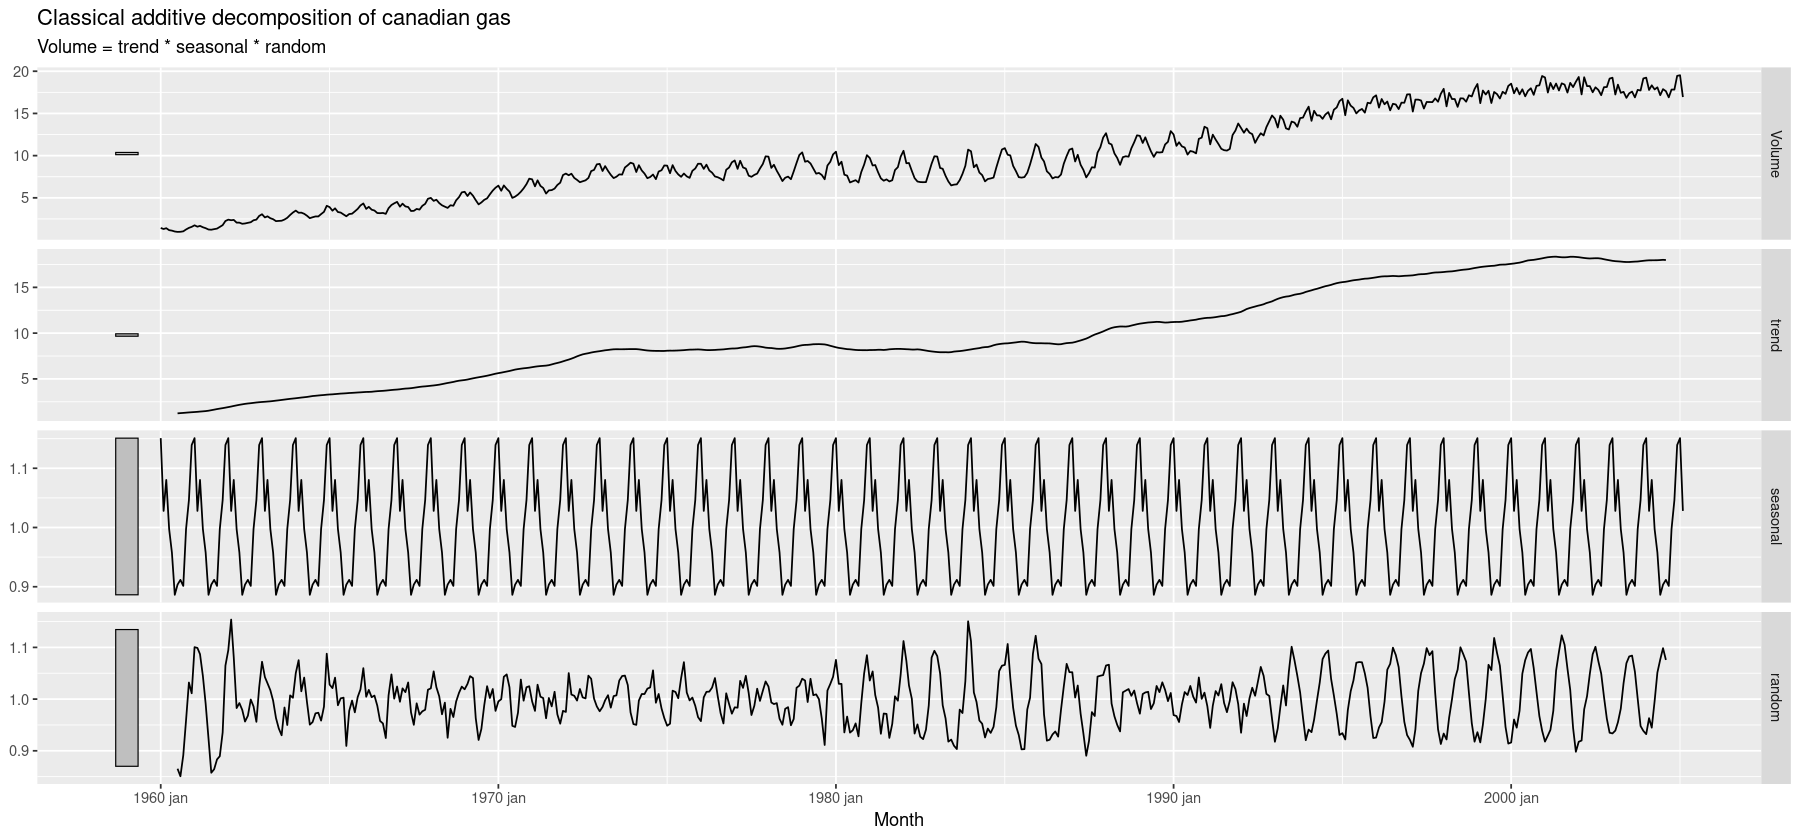

In [92]:
df |> model(
    classical_decomposition(
        Volume, type = "multiplicative"
    )
) |> components() |> autoplot() +
labs(
  title = "Classical additive decomposition of canadian gas"
)

In [108]:
df$LogVolume = log1p(df$Volume)

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”


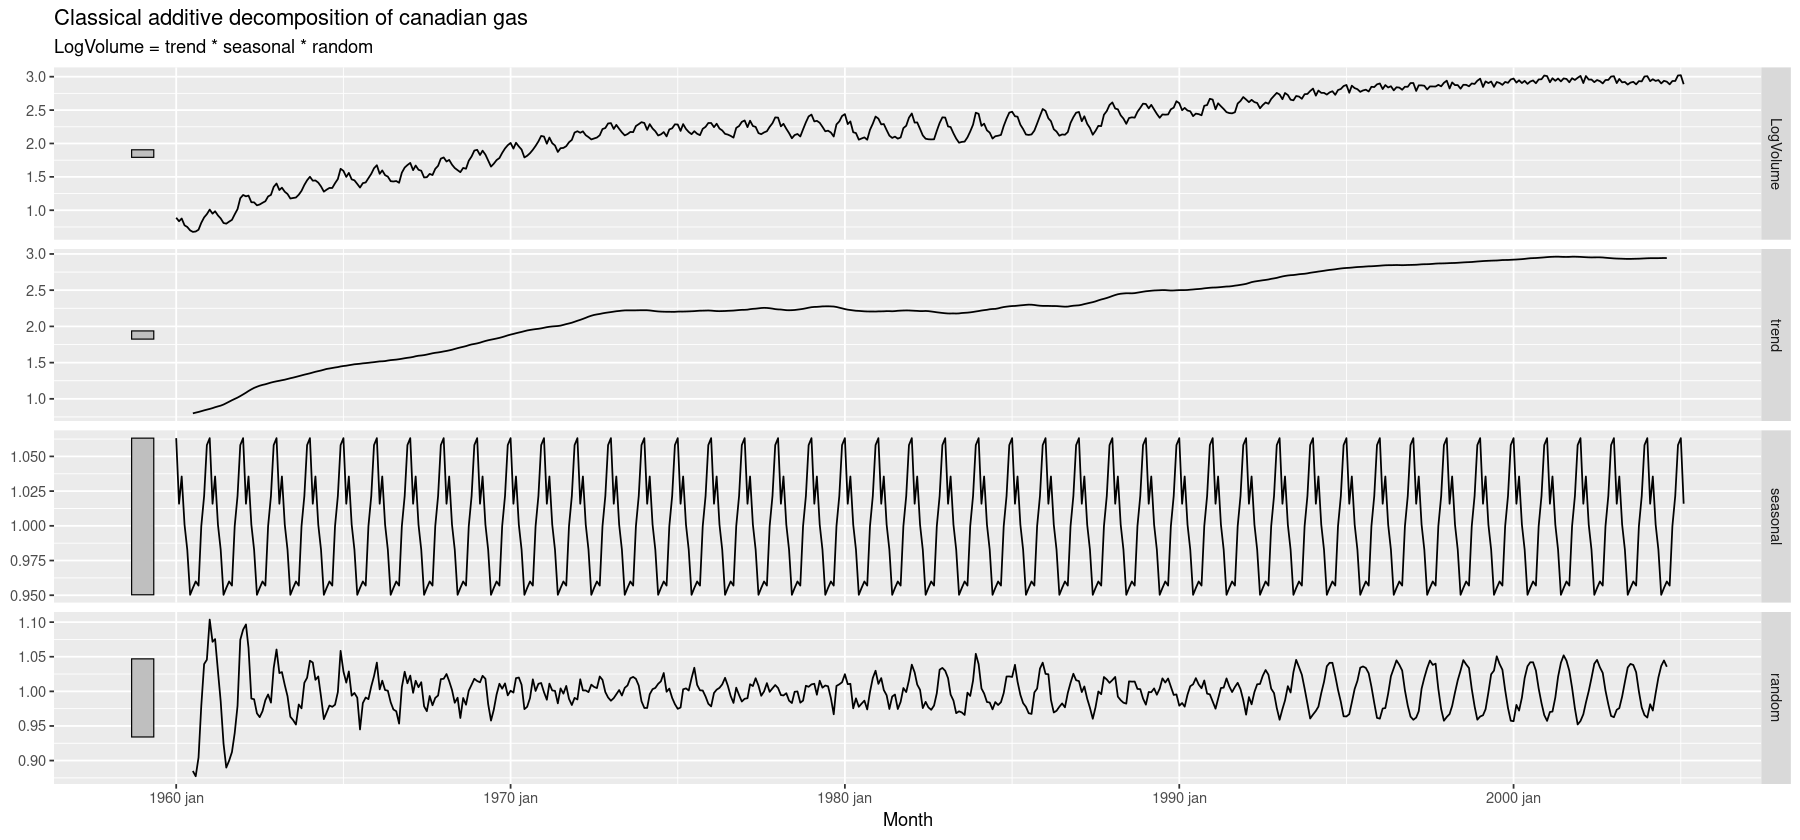

In [102]:
df |> model(
    classical_decomposition(
        LogVolume, type = "multiplicative"
    )
) |> components() |> autoplot() +
labs(
  title = "Classical additive decomposition of canadian gas"
)

#### 2.2. Time Series Decomposing With LOESS

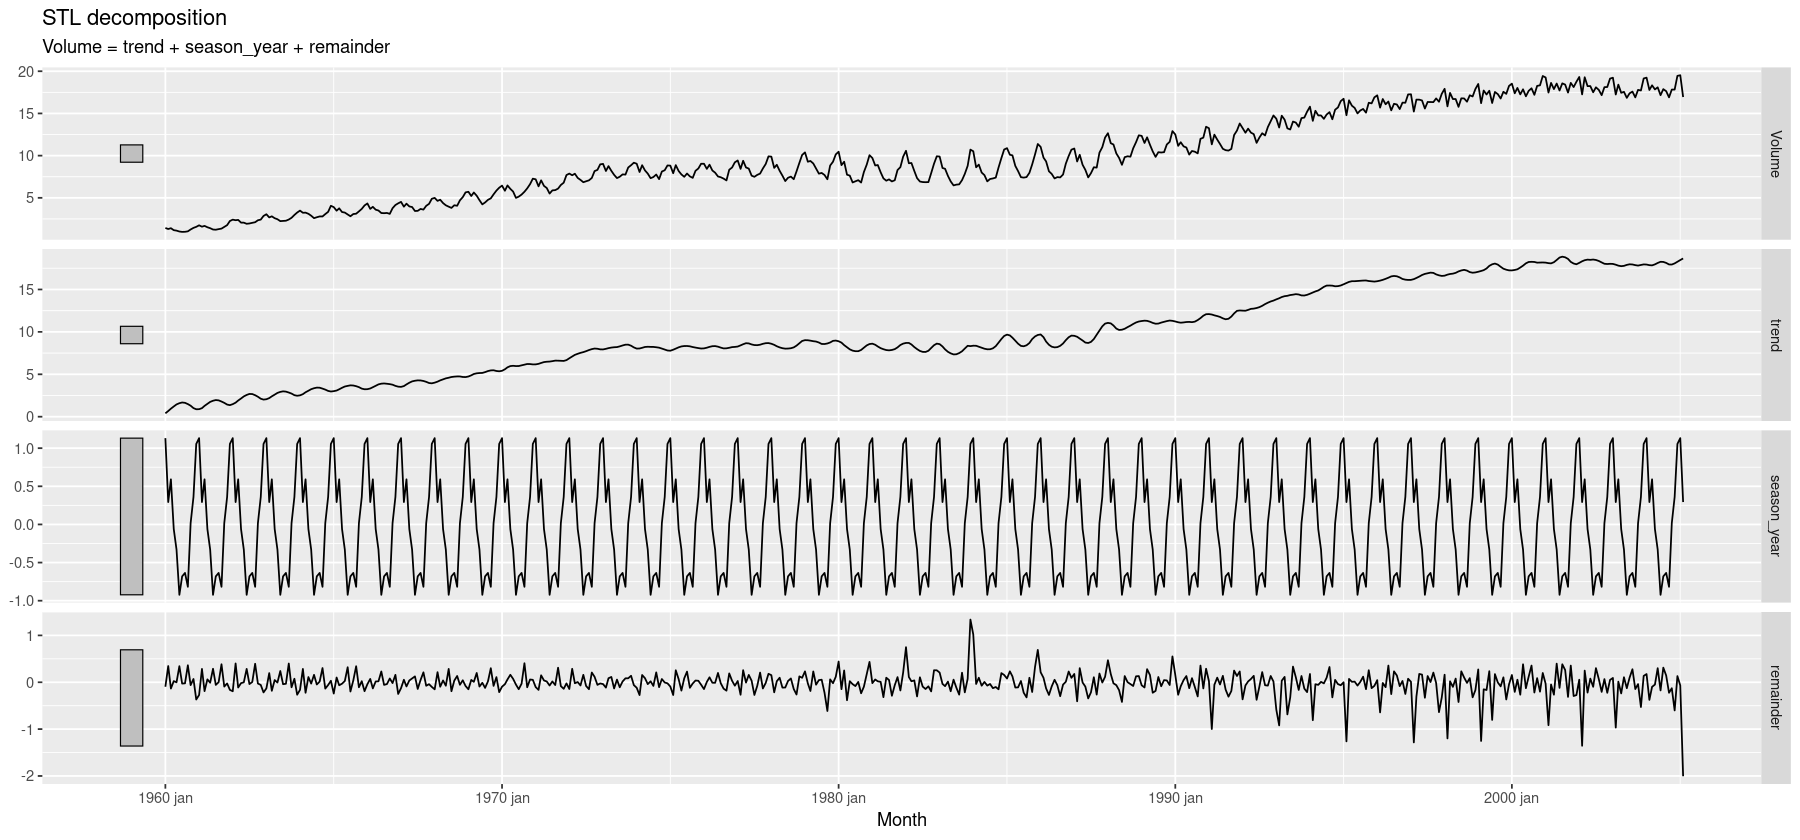

In [104]:
df |>
    model(
        STL(Volume ~ trend(window = 7) + season(window = "periodic"),
        robust = TRUE
    )
) |> components() |> autoplot()

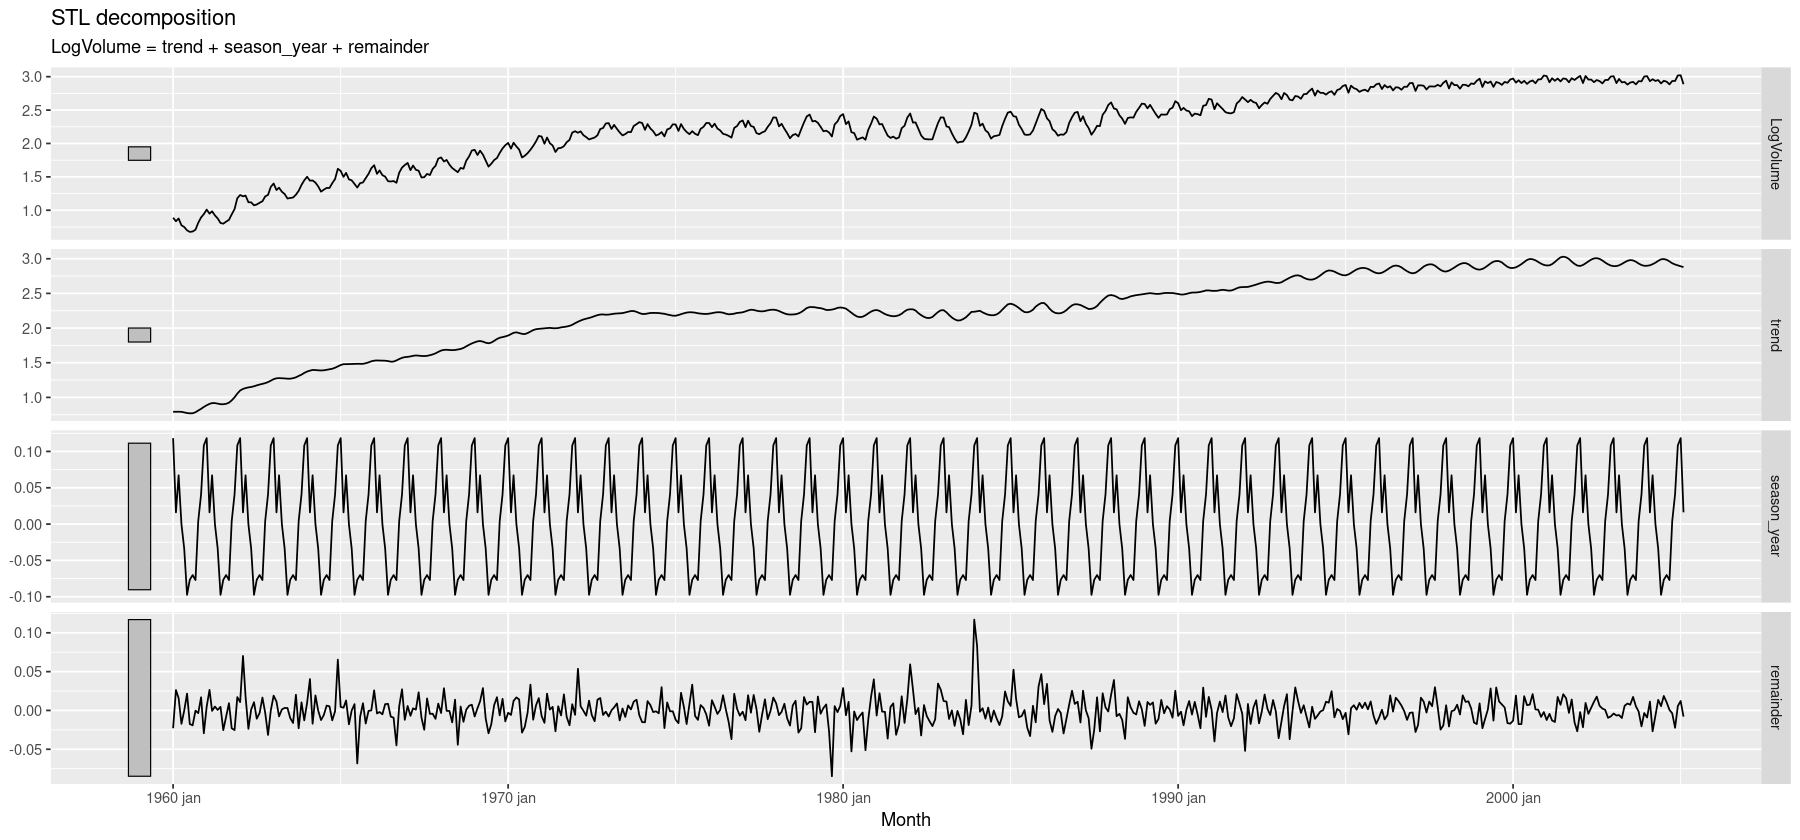

In [105]:
df |>
    model(
        STL(LogVolume ~ trend(window = 7) + season(window = "periodic"),
        robust = TRUE
    )
) |> components() |> autoplot()